In [17]:
import numpy as np
import importlib
import Hamilton as hm
import create_distribution as cd
importlib.reload(hm)
import Ansatz as an
importlib.reload(an)
importlib.reload(cd)
from qiskit.visualization import plot_histogram
from qiskit.primitives import Estimator
from qiskit.algorithms import VarQITE
from qiskit.algorithms.time_evolvers.variational import ImaginaryMcLachlanPrinciple
from qiskit.algorithms import TimeEvolutionProblem
from qiskit.quantum_info import *
import pylab
from qiskit.algorithms import SciPyImaginaryEvolver
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt







## evolution

In [18]:
depth = 1
qubits = 3
hamiltonian = Operator(np.kron(hm.Ham(qubits,1,2),hm.krId(qubits)) )
var_principle = ImaginaryMcLachlanPrinciple()
time = 0.5
aux_ops = [hamiltonian]
init_param_values =  [np.pi/2]*qubits + [0]*(depth*qubits*2+qubits)
ansatz = an.ansatz_review_exact(qubits*2,depth)
evolution_problem = TimeEvolutionProblem(hamiltonian, time, aux_operators=aux_ops)
var_qite = VarQITE(ansatz, init_param_values, var_principle, Estimator())
evolution_result = var_qite.evolve(evolution_problem)


KeyboardInterrupt: 

In [ ]:
init_state = Statevector(ansatz.assign_parameters(init_param_values))
evolution_problem = TimeEvolutionProblem(hamiltonian, time, initial_state=init_state, aux_operators=aux_ops)
exact_evol = SciPyImaginaryEvolver(num_timesteps=int(time * 100))
sol = exact_evol.evolve(evolution_problem)

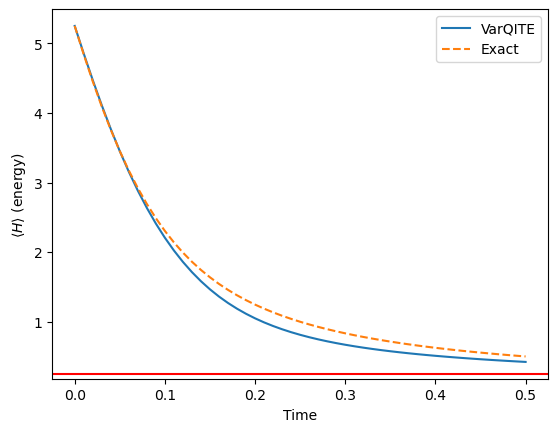

In [ ]:
h_exp_val = np.array([ele[0][0] for ele in evolution_result.observables])
exact_h_exp_val = sol.observables[0][0].real

times = evolution_result.times
pylab.plot(times, h_exp_val, label= "VarQITE")
pylab.plot(times, exact_h_exp_val , label= "Exact",  linestyle='--')
plt.axhline(y=0.25, color='r', linestyle='-')
pylab.xlabel("Time")
pylab.ylabel(r"$\langle H \rangle$ (energy)")
pylab.legend(loc="upper right");

<BarContainer object of 9 artists>

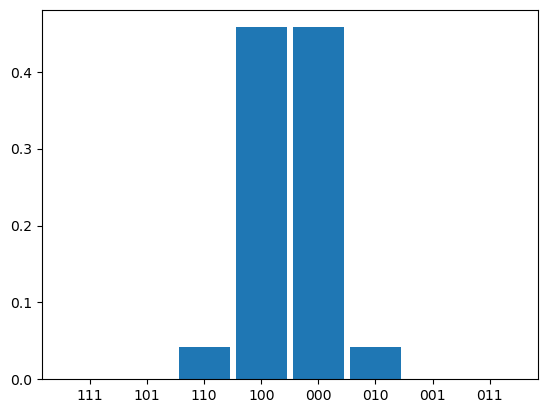

In [ ]:
evolved_state = evolution_result.evolved_state
varqite_result = Statevector(evolved_state).probabilities_dict([0,1,2])
scipy_result = Statevector(sol.evolved_state).probabilities_dict([0,1,2])

x=["111","101","110","100","000","010","001","011","001"]
y=[]
for i in range(len(x)):
    y.append(varqite_result[x[i]])
    
#plot_histogram(scipy_result,figsize= (12,3),sort='asc',bar_labels=False)
plt.bar(x, y, width=0.9)
#plot_histogram(varqite_result,figsize= (12,3),sort='asc',bar_labels=False)

In [ ]:
param = evolution_result.parameter_values[int(time*100)][:]
binded = an.ansatz_review_exact(qubits*2,depth).bind_parameters(param)
state = Statevector(binded)
estimator = Estimator()
op = Operator(np.kron(hm.Ham(3,1,2),hm.krId(3)))
expectation_value = estimator.run(binded, op).result().values
print(expectation_value)
# for shot-based simulation:
expectation_value_shot = estimator.run(binded, op, shots=100).result().values
print(expectation_value_shot)

[12.25]
[12.25001419]


In [ ]:
print(1 / (np.trace(np.exp(-1 * hm.Ham(3, 1, 2)+hm.Ham(3,1,3))) * np.trace(np.exp(-1 * hm.Ham(3, 1, 2)+hm.Ham(3,1,3)) * hm.Ham(3, 1, 2))))

(2.0479855796182767e-28+0j)


ValueError: x and y must have same first dimension, but have shapes (51,) and (52,)

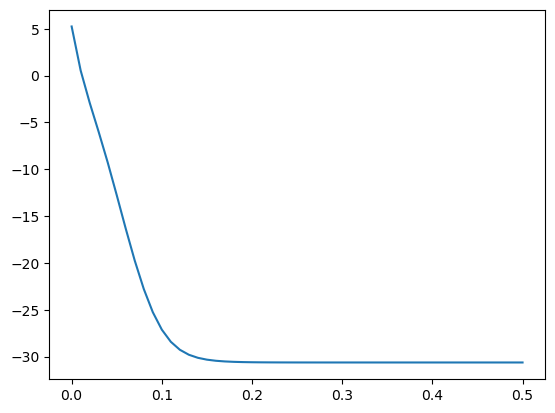

In [ ]:
cd.compare_results(evolution_result, sol, h_exp_val, exact_h_exp_val)

In [ ]:
cd.get_expval_shot(binded, hm.Ham(3,1,2), 3, 100)

NameError: name 'cd' is not defined

In [13]:
def generate_strings(d):
    combinations = []
    def gen_nested(counters, depth):
        if depth == d:
            concatenated_str =  "0" + "".join(str(counter) for counter in counters)
            combinations.append(concatenated_str)
            return
        for i in range(2):
            counters[depth] = i
            gen_nested(counters, depth +1)
    
    counters = [0] * d
    gen_nested(counters,0)

    return combinations



In [19]:
generate_strings(3)

IndexError: list assignment index out of range

In [33]:
def generate_combinations_interchange(d):
    combinations=[]
    combinations_negative = []
    def generate_nested_interchange(counters, depth):
        if depth == d:
            concatenated_str = "".join(str(counter) for counter in counters)
            concatenated_str_2 = "".join(str(counter) for counter in counters)
            combinations.append("0" + concatenated_str[::-1])
            combinations_negative.append("1" + concatenated_str_2[::-1])
            return

        for i in range(2):
            counters[depth] = i
            generate_nested_interchange(counters, depth + 1)

    counters = [0] * d
    generate_nested_interchange(counters, 0)
    return combinations_negative[::-1] + combinations

print(generate_combinations_interchange(3))


['1111', '1011', '1101', '1001', '1110', '1010', '1100', '1000', '0000', '0100', '0010', '0110', '0001', '0101', '0011', '0111']
